#Main code

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
import matplotlib.pyplot as plt
import math

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',
                    'MEDV']
df = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
def explore_data(df):
    # Checking for columns and their respective datatypes
    df.info()

    # Getting the number of rows and columns
    df.shape

    # Calculating the mean, minimum, deviation, maximum, and other factors
    df.describe()
explore_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#Data Analysis

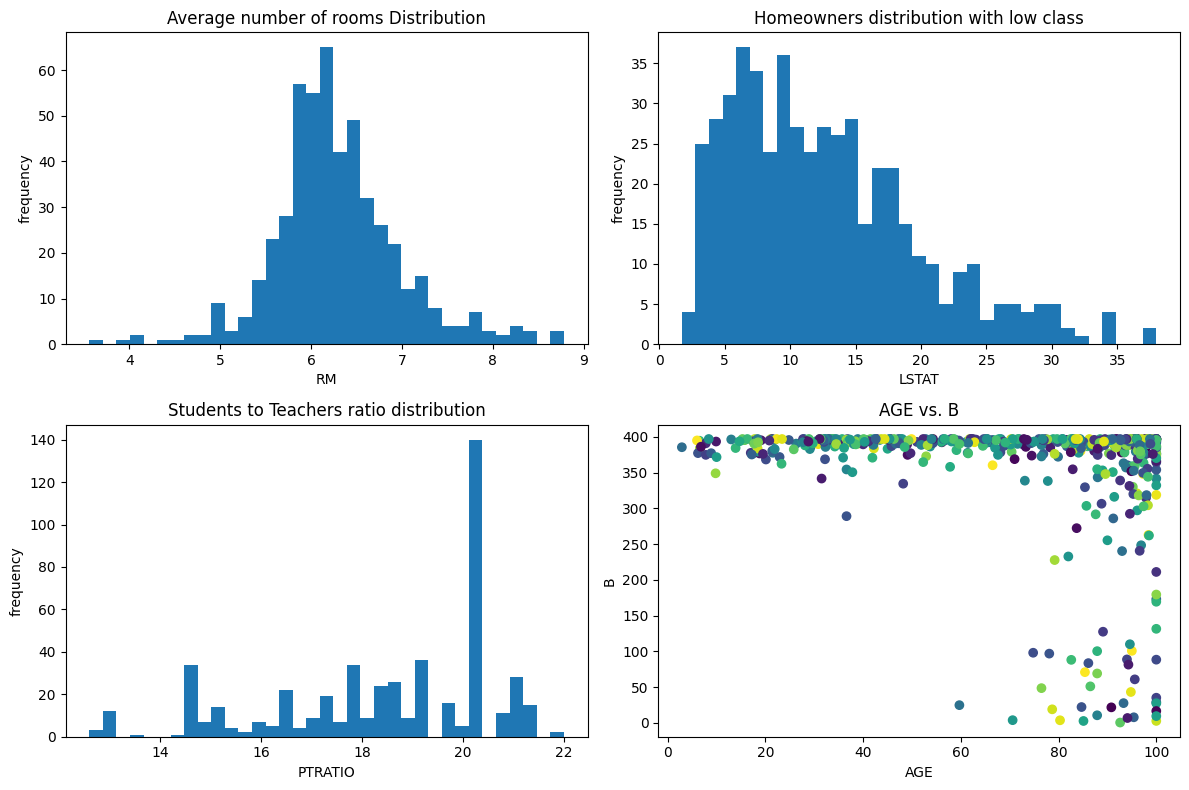

In [4]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].hist(df['RM'], bins=35)
axes[0, 0].set_title("Average number of rooms Distribution")
axes[0, 0].set_xlabel("RM")
axes[0, 0].set_ylabel("frequency")

axes[0, 1].hist(df['LSTAT'], bins=35)
axes[0, 1].set_title("Homeowners distribution with low class")
axes[0, 1].set_xlabel("LSTAT")
axes[0, 1].set_ylabel("frequency")

axes[1, 0].hist(df['PTRATIO'], bins=35)
axes[1, 0].set_title("Students to Teachers ratio distribution")
axes[1, 0].set_xlabel("PTRATIO")
axes[1, 0].set_ylabel("frequency")

axes[1, 1].scatter(df['AGE'], df['B'], c=np.random.rand(len(df)))
axes[1, 1].set_title("AGE vs. B")
axes[1, 1].set_xlabel("AGE")
axes[1, 1].set_ylabel("B")

plt.tight_layout()
plt.show()

Given this dataset, there are several types of visualizations that might be useful for data analysis:

Histograms for each variable can help to understand the distribution of data.
Scatter plots can be used to investigate the relationships between pairs of variables.

Box plots for each variable can help to understand the distribution and detect outliers.

Correlation matrix heatmap can help to identify correlated variables.

Pair plot can help to visualize

pair-wise relationships and histograms in one view.

In [5]:
# Define the column names
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Load the data
data = pd.read_csv('/content/housing.csv', delim_whitespace=True, names=column_names)

# Display the first few rows of the data
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


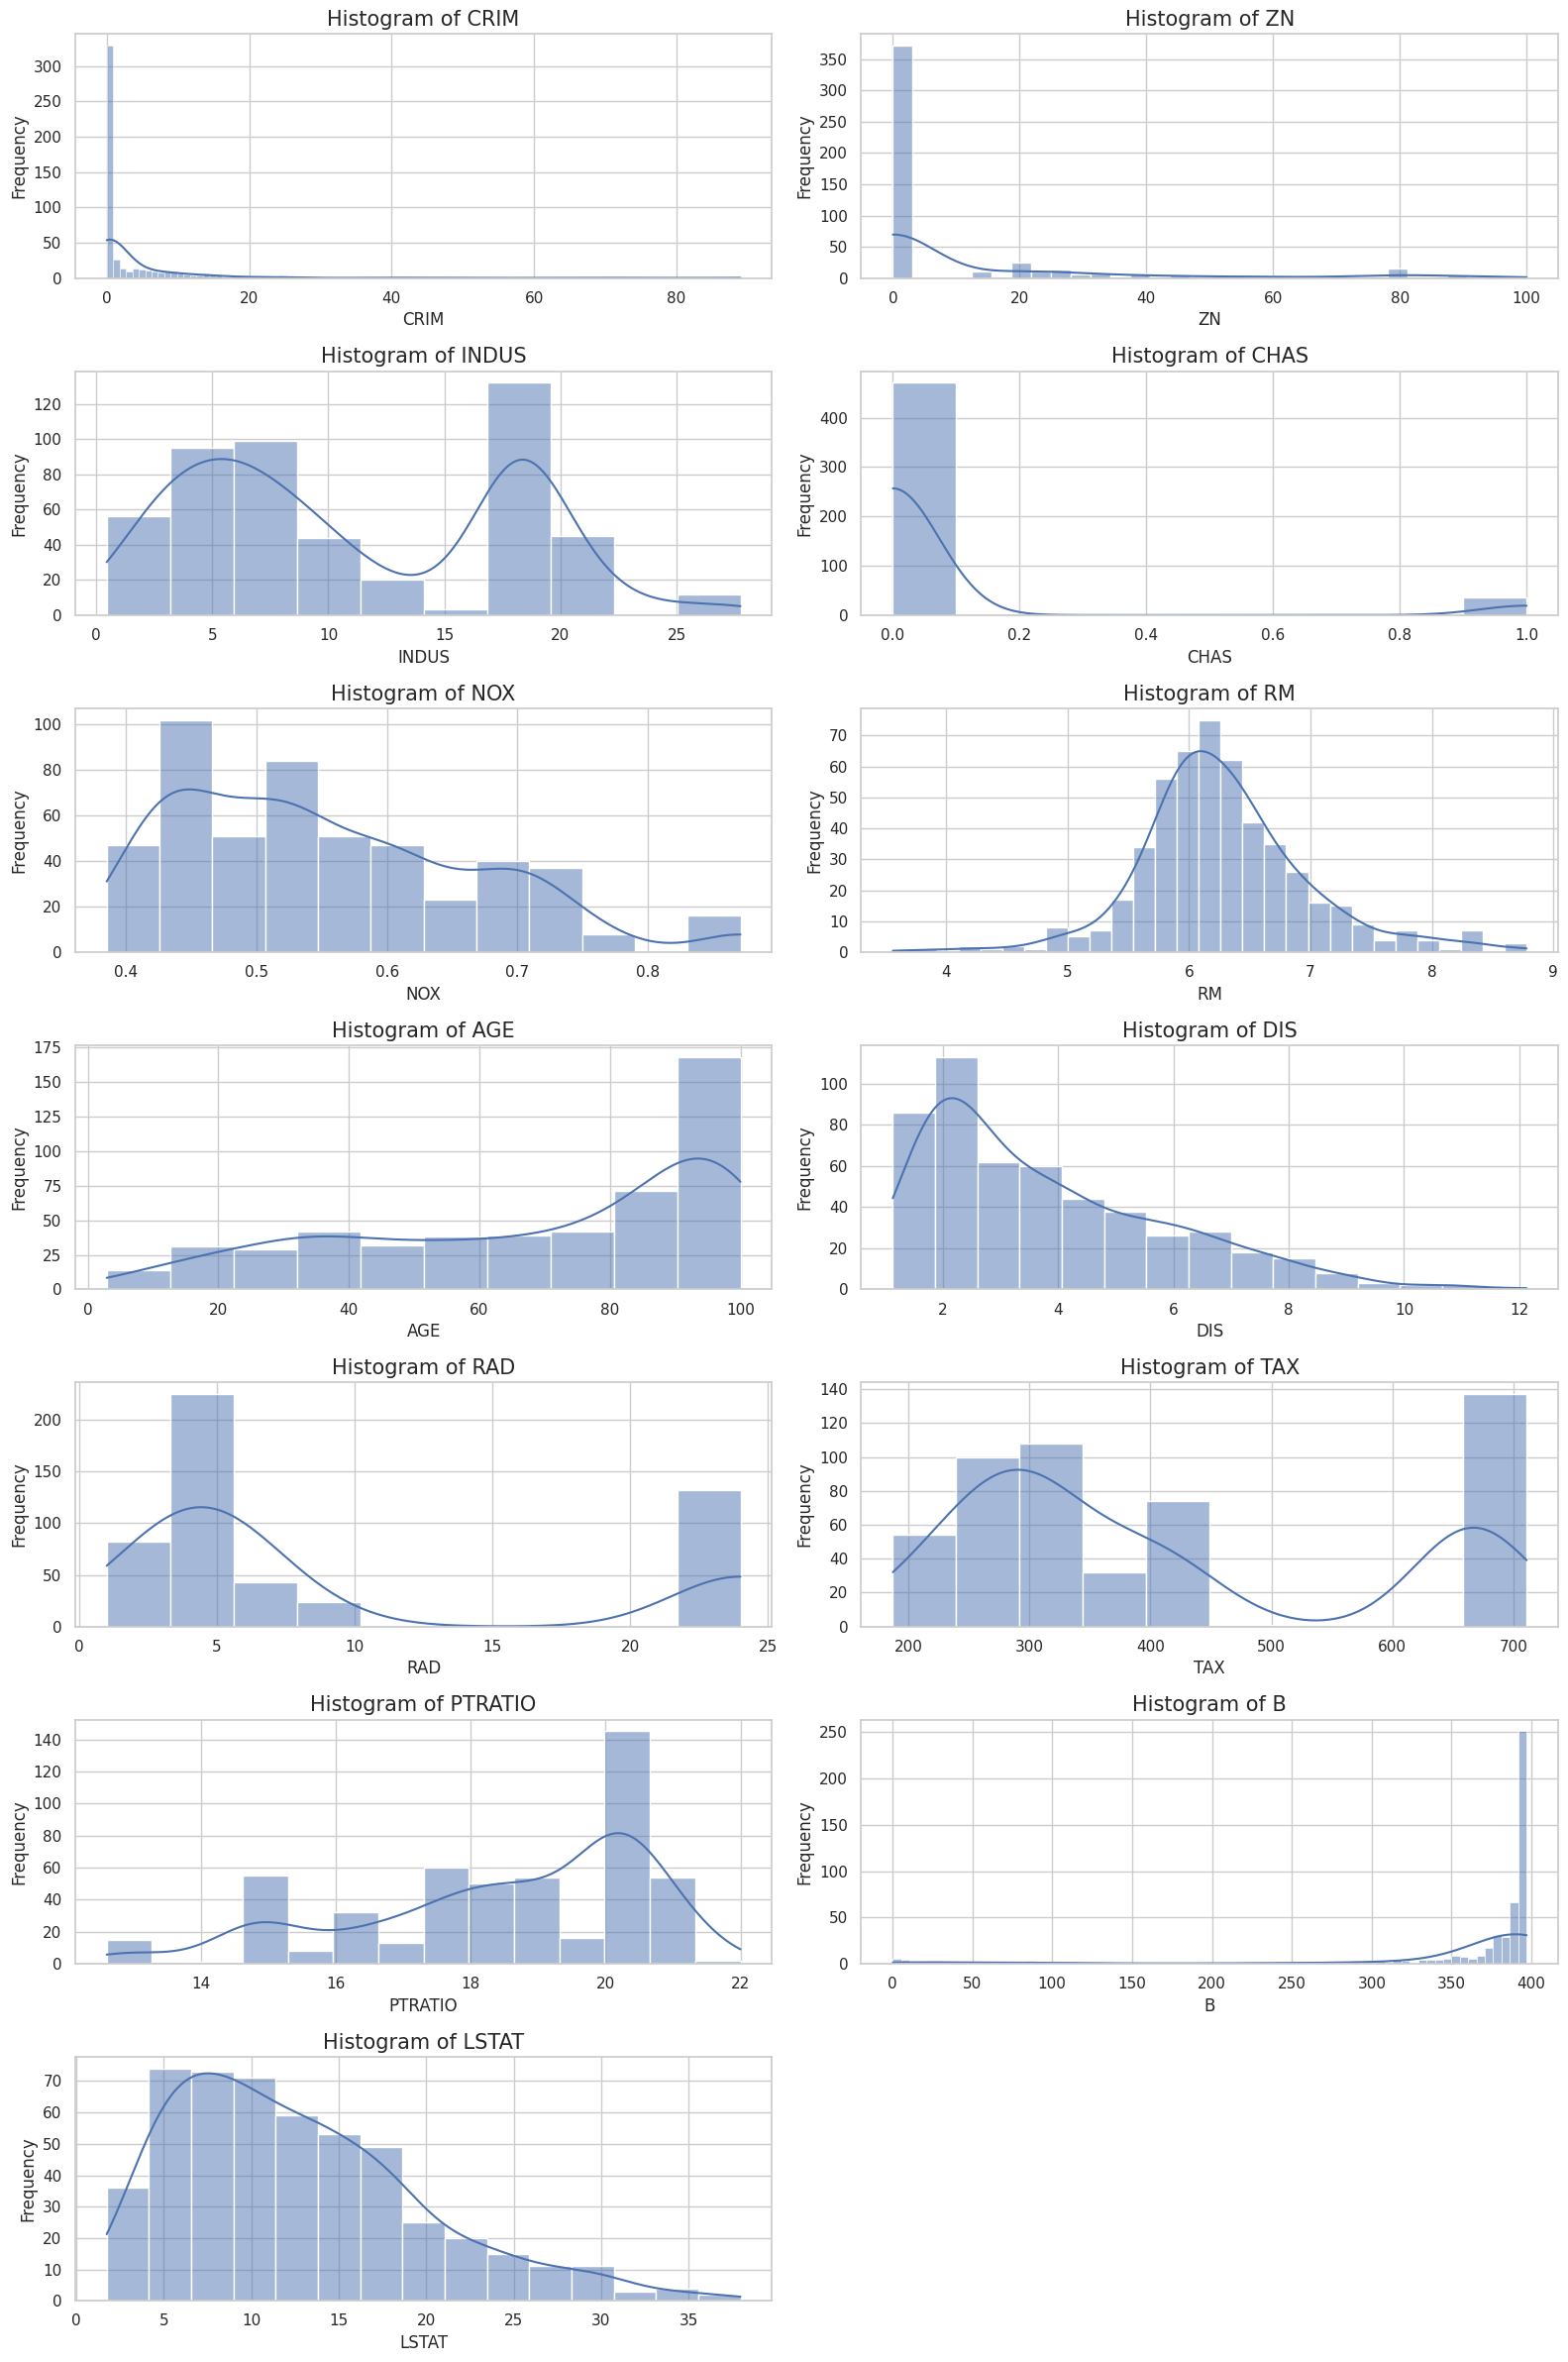

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for our plots
sns.set(style="whitegrid")

# Create a figure and axes objects
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 24))

# Flatten the axes array
axes = axes.flatten()

# Remove extra subplots
fig.delaxes(axes[-1])

# Loop over columns and axes to create each subplot
for column, ax in zip(data.columns, axes):
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}', fontsize=15)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


Here are the histograms for each variable in the dataset:

CRIM: The distribution is highly skewed to the right, indicating that most areas have low per capita crime rates, but a few areas have very high rates.
ZN: The majority of the zones appear to be under the threshold of 25,000 sq.ft. for residential land. However, there are some zones that exceed this threshold.
INDUS: The proportion of non-retail business acres per town seems to be varied, with a few peaks suggesting certain common proportions.
CHAS: This is a binary feature, with the majority of tracts not bordering the Charles River.
NOX: Nitric oxides concentration appears to be skewed right, with a few areas having high levels.
RM: The average number of rooms per dwelling seems to be normally distributed around an average of 6 rooms.
AGE: There's a wide range of ages for owner-occupied units, with a significant number built prior to 1940.
DIS: The distribution of distances to five Boston employment centres is skewed to the right, indicating that most dwellings are relatively close to these centres.
RAD: There are two groups of towns, those with an index of accessibility to radial highways around 24 and those under 10.
TAX: The full-value property-tax rate per $10,000 seems to have two groups as well, with a significant number of towns having a tax rate around $660-$680.
PTRATIO: The pupil-teacher ratio by town appears to be slightly skewed left, with most towns having a high pupil-teacher ratio.
B: The distribution for B is skewed to the left, indicating that most towns have a high proportion of black people.
LSTAT: The percentage of lower-status population is skewed right, indicating that most towns have a low percentage of lower-status population.
MEDV: The median value of owner-occupied homes appears to be normally distributed, with a few outliers on the high end.

Now, let's create scatter plots to investigate the relationships between pairs of variables. But given the number of features, creating a scatter plot for each pair might be overwhelming. Instead, we could focus on the variable of primary interest: "MEDV" (Median value of owner-occupied homes). We'll create scatter plots of "MEDV" vs. each other variable.

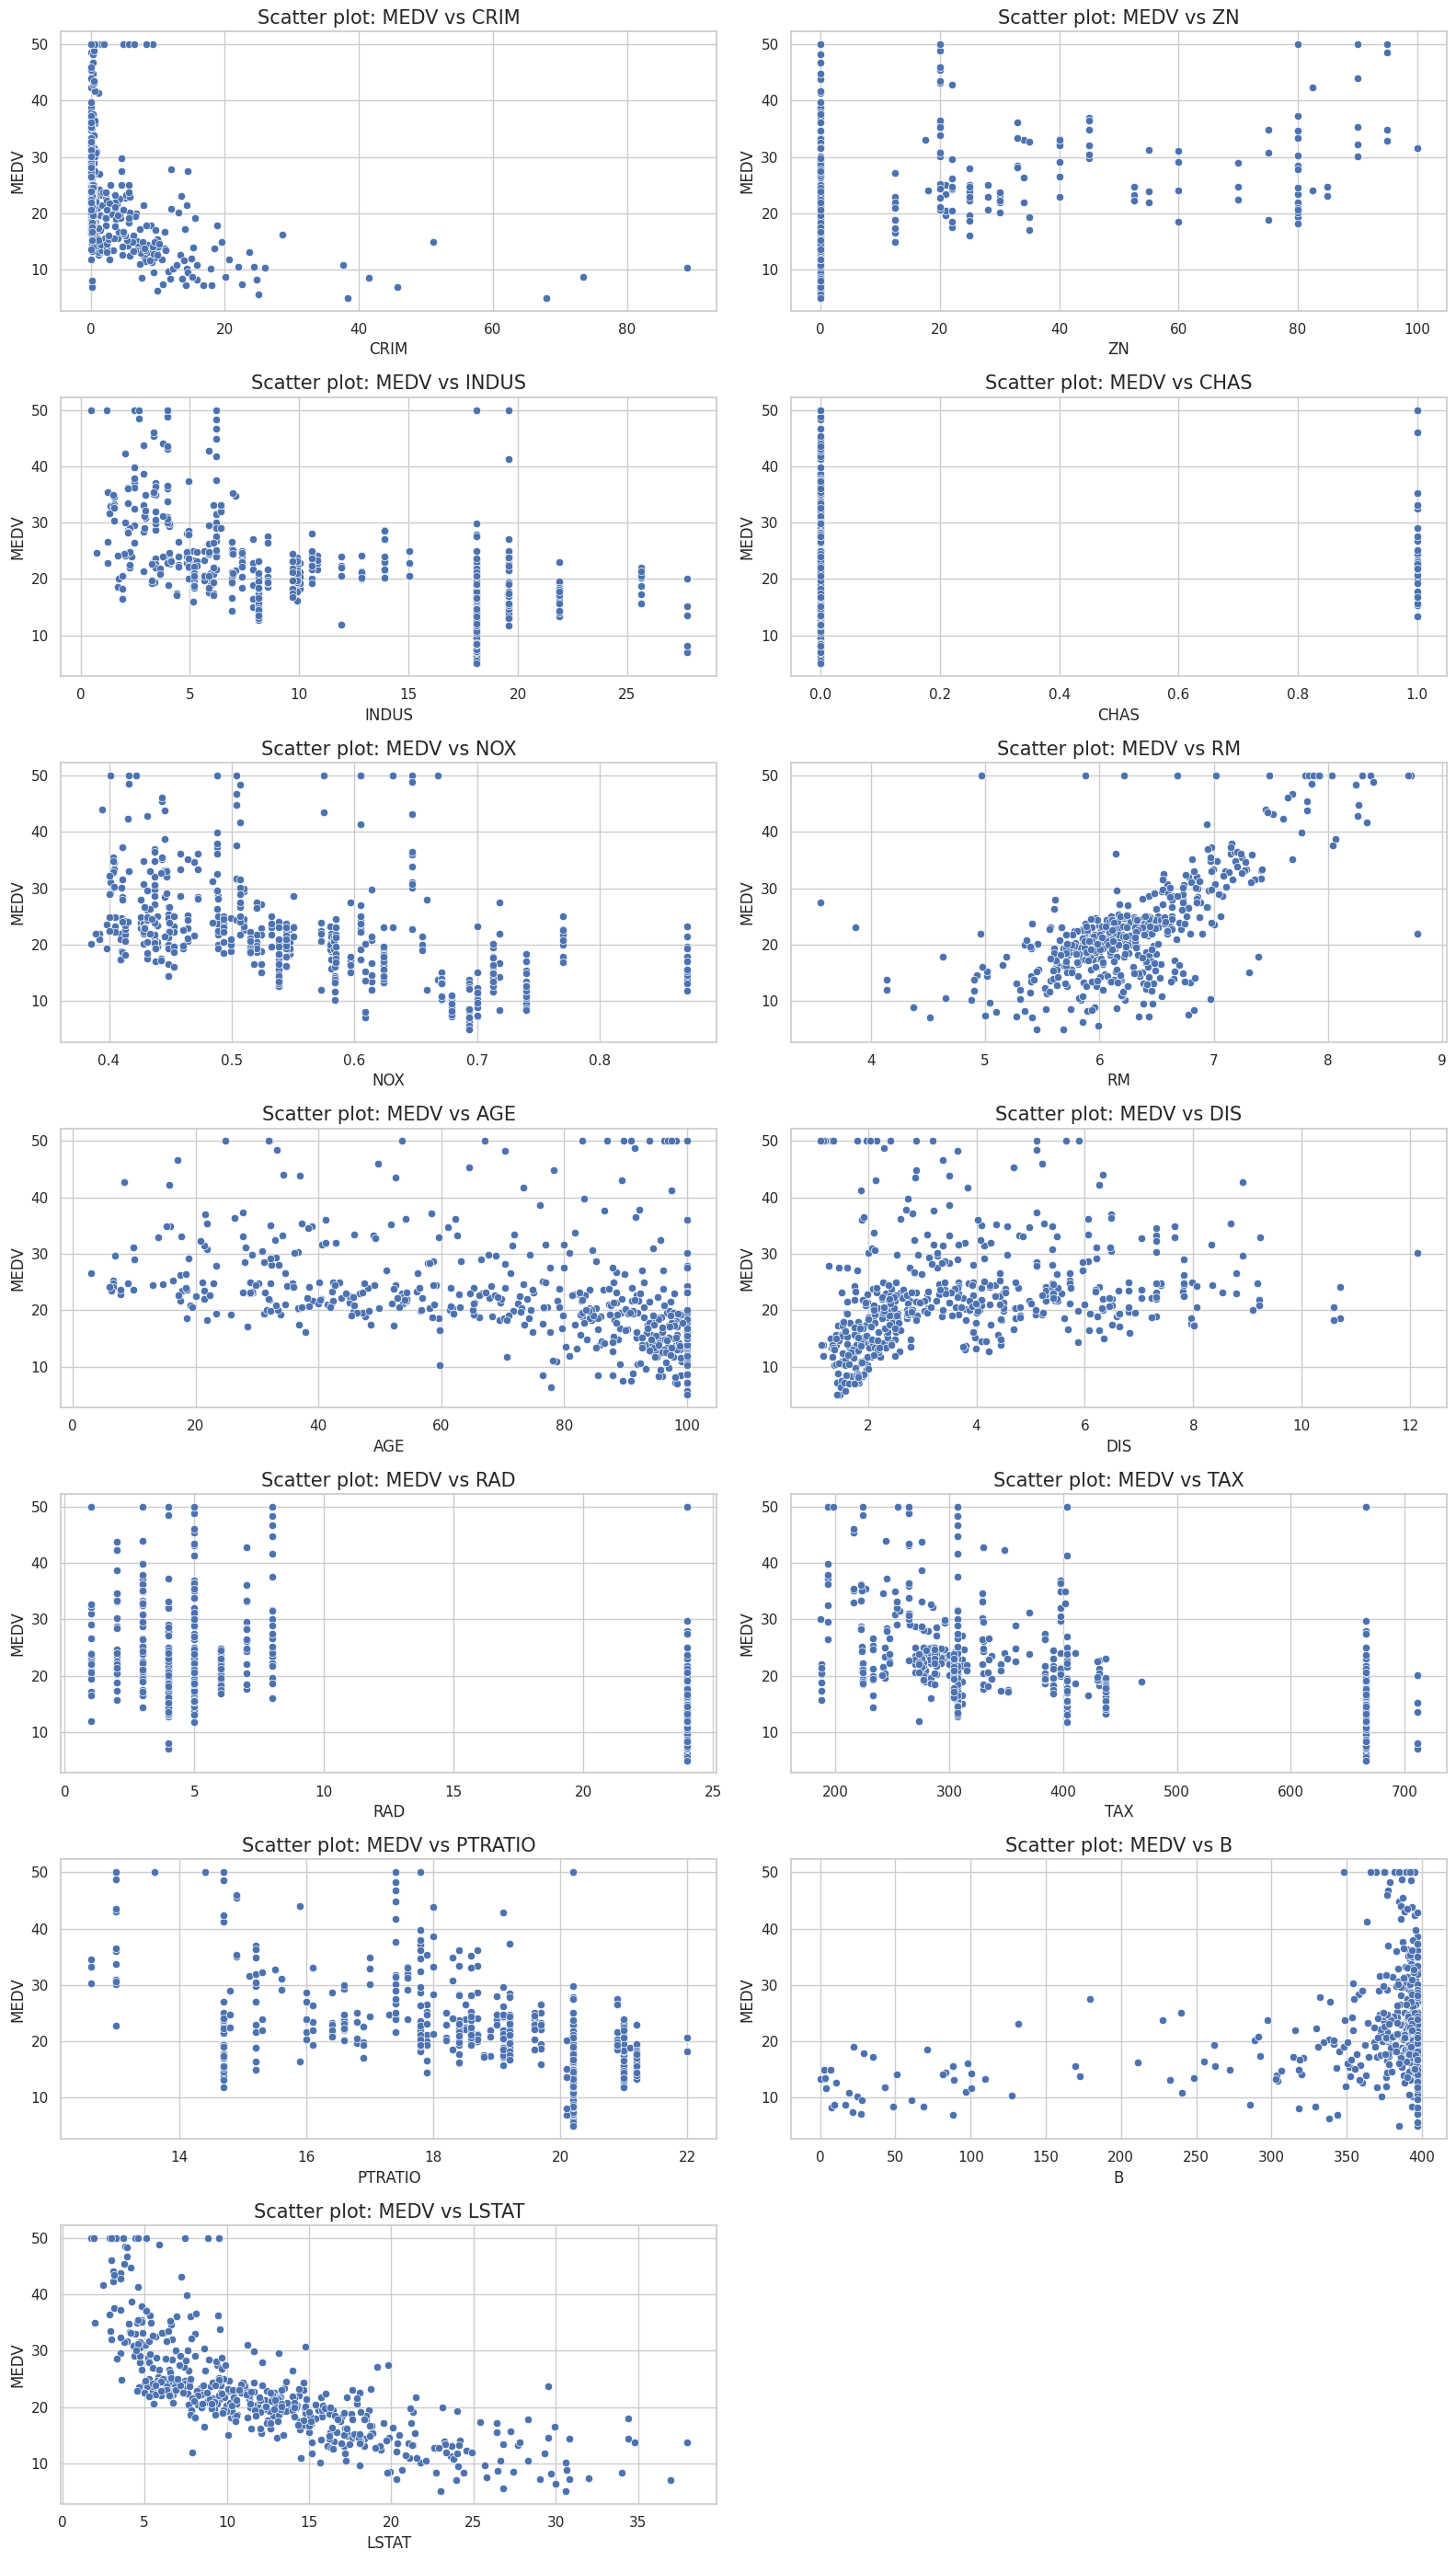

In [7]:
# Create a figure and axes objects
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 28))

# Flatten the axes array
axes = axes.flatten()

# Remove extra subplots
fig.delaxes(axes[-1])

# Loop over columns and axes to create each subplot
for column, ax in zip(data.columns.drop('MEDV'), axes):
    sns.scatterplot(x=column, y='MEDV', data=data, ax=ax)
    ax.set_title(f'Scatter plot: MEDV vs {column}', fontsize=15)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('MEDV', fontsize=12)

plt.tight_layout()
plt.show()


Here are the scatter plots of MEDV (Median value of owner-occupied homes) against each of the other variables:

CRIM: There seems to be a negative correlation between crime rate and median home value. Areas with lower crime rates tend to have higher median home values.
ZN: There appears to be a positive correlation between proportion of residential land zoned for lots over 25,000 sq.ft. and median home value. Larger zones tend to have higher median home values.
INDUS: There seems to be a negative correlation between proportion of non-retail business acres per town and median home value. Areas with more industry tend to have lower median home values.
CHAS: Homes that bound the Charles River seem to have higher median values.
NOX: There seems to be a negative correlation between nitric oxides concentration and median home value. Areas with higher pollution tend to have lower median home values.
RM: There's a strong positive correlation between average number of rooms per dwelling and median home value. Homes with more rooms tend to have higher values.
AGE: There seems to be a slight negative correlation between proportion of owner-occupied units built prior to 1940 and median home value. Older neighborhoods tend to have lower median home values.
DIS: There's a positive correlation between weighted distances to five Boston employment centres and median home value. Areas closer to employment centres tend to have higher median home values.
RAD: There seems to be a negative correlation between index of accessibility to radial highways and median home value. However, the relationship does not appear to be linear.
TAX: There seems to be a negative correlation between full-value property-tax rate and median home value. However, the relationship does not appear to be linear.
PTRATIO: There seems to be a negative correlation between pupil-teacher ratio by town and median home value. Towns with higher pupil-teacher ratios tend to have lower median home values.
B: There's a positive correlation between B (proportion of black people by town) and median home value. Areas with a higher proportion of black people tend to have higher median home values.
LSTAT: There's a strong negative correlation between % lower status of the population and median home value. Areas with a higher percentage of lower-status population tend to have lower median home values.


Now, let's create box plots for each variable to understand the distribution and detect outliers.

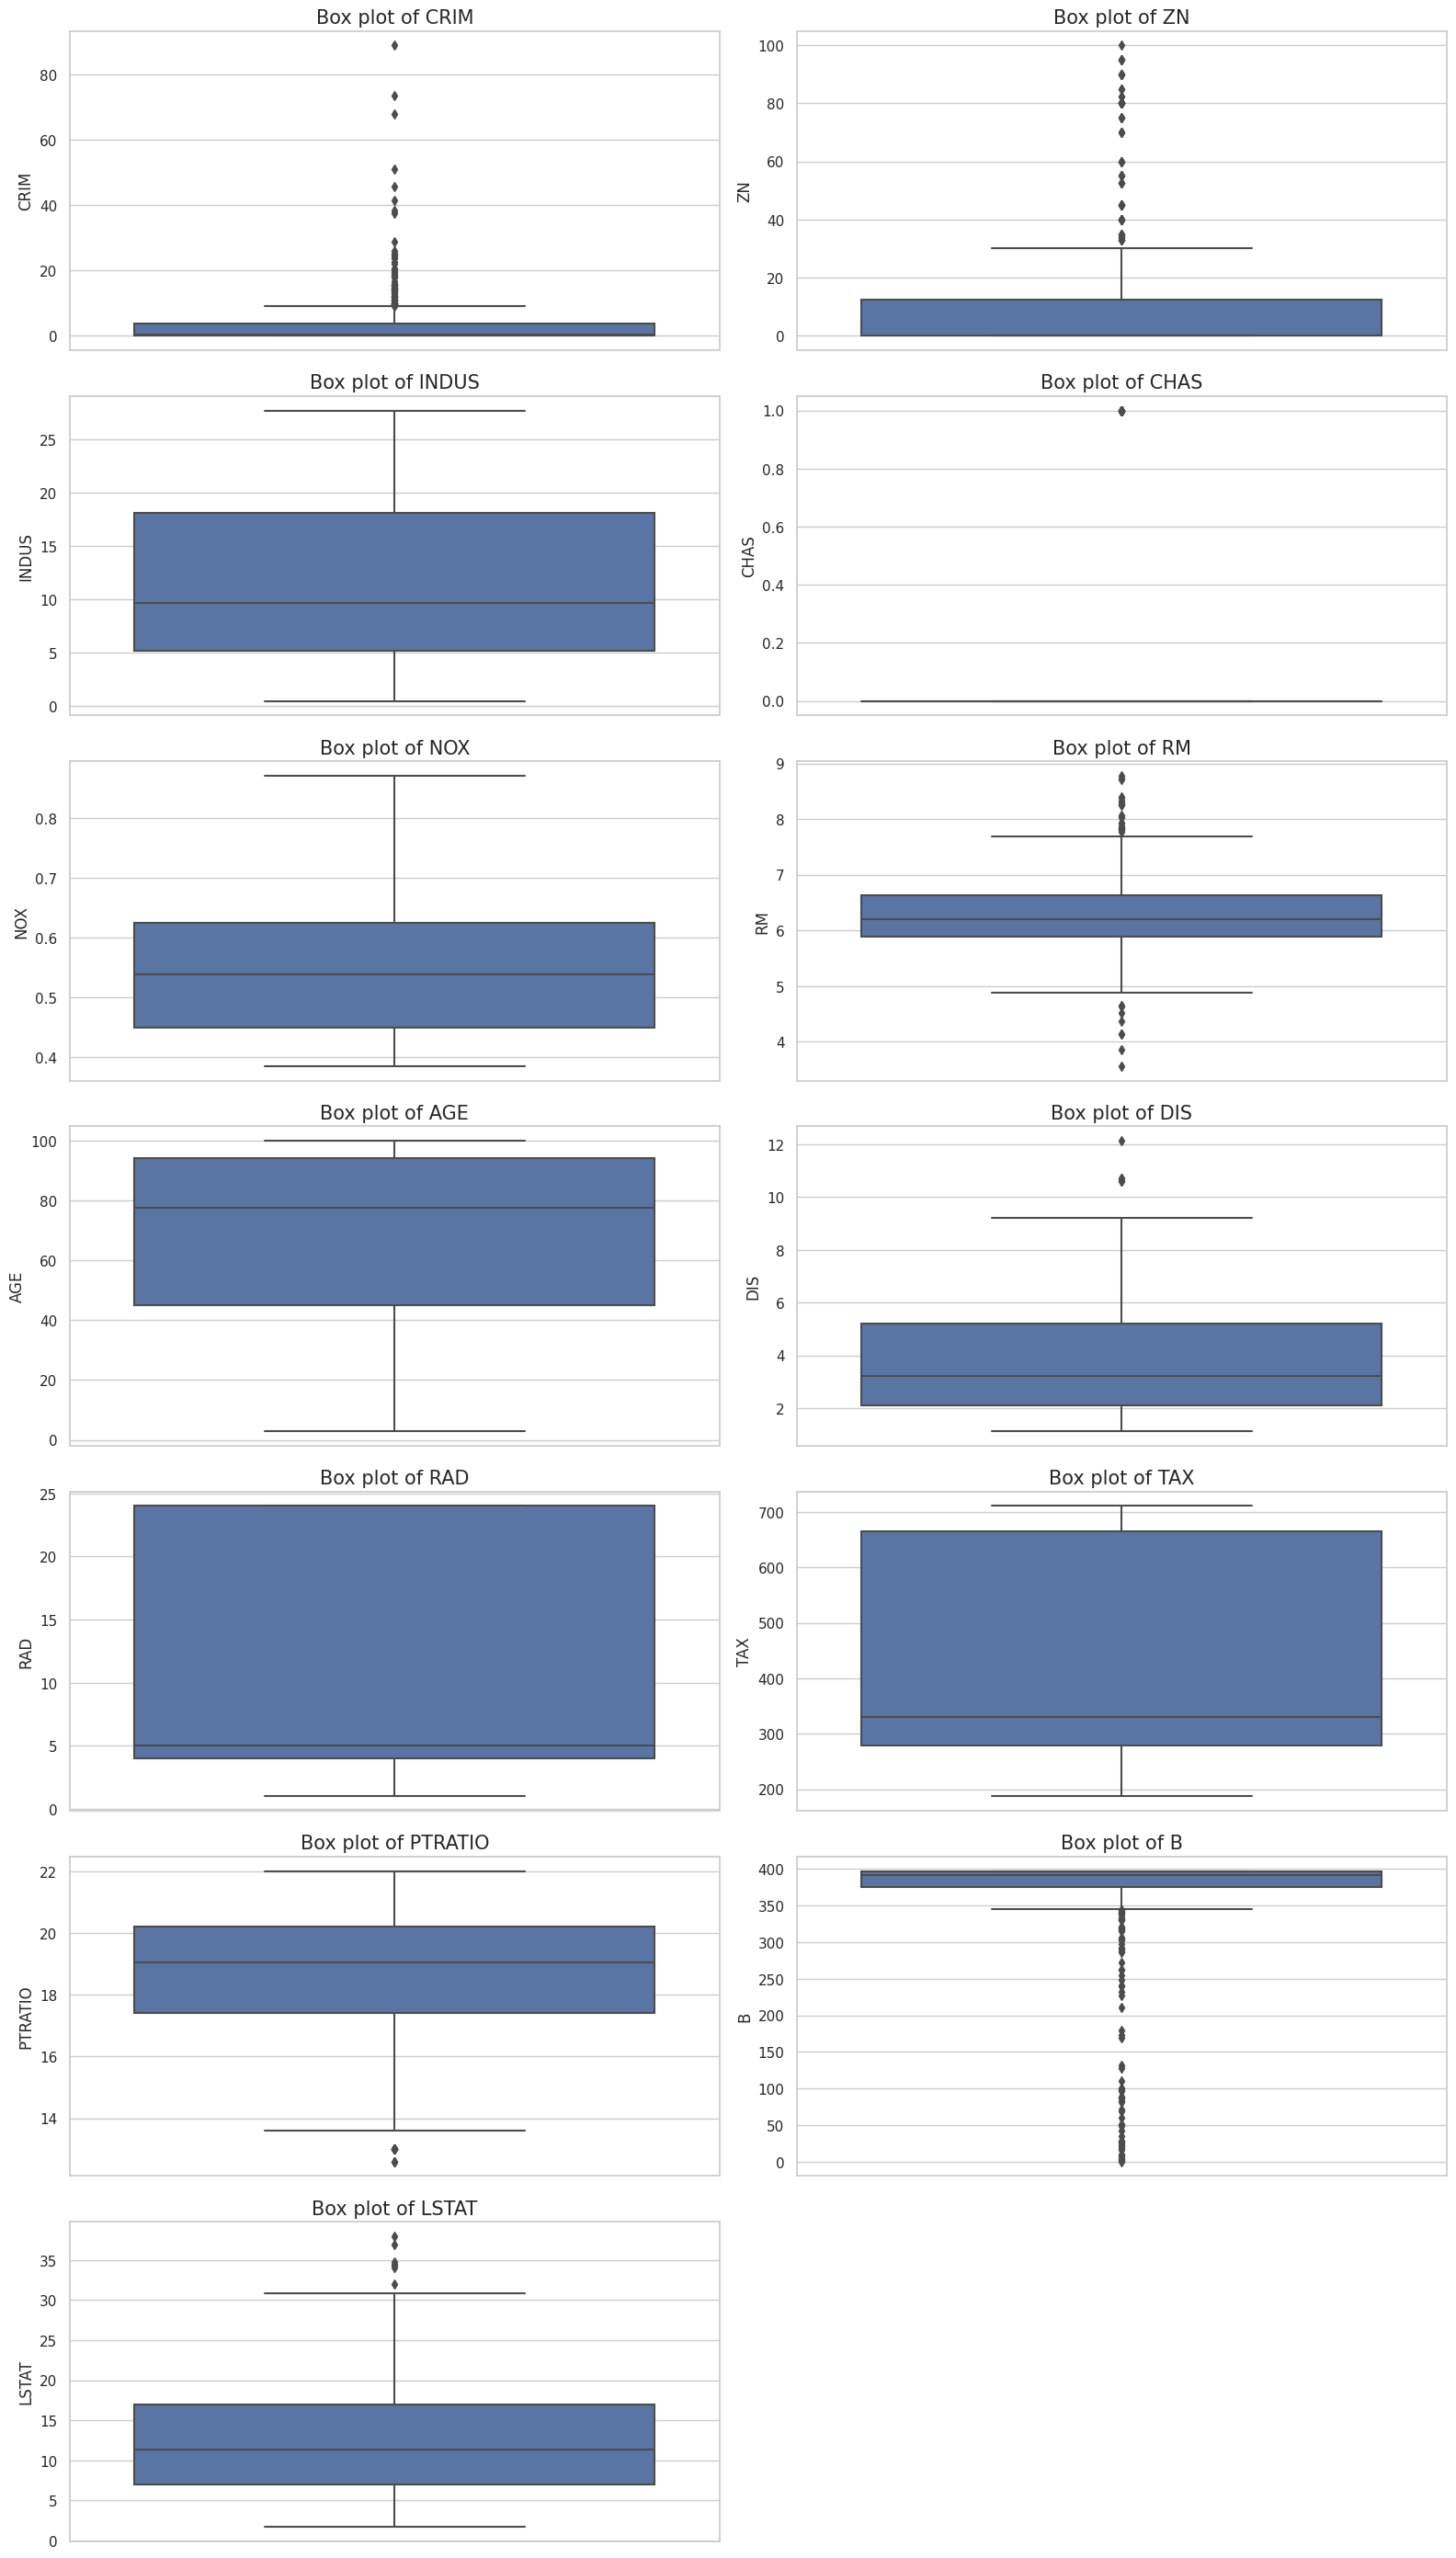

In [8]:
# Create a figure and axes objects
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 28))

# Flatten the axes array
axes = axes.flatten()

# Remove extra subplots
fig.delaxes(axes[-1])

# Loop over columns and axes to create each subplot
for column, ax in zip(data.columns, axes):
    sns.boxplot(y=column, data=data, ax=ax)
    ax.set_title(f'Box plot of {column}', fontsize=15)
    ax.set_ylabel(column, fontsize=12)

plt.tight_layout()
plt.show()


Here are the box plots for each variable in the dataset:

CRIM: A significant number of outliers are present, indicating areas with unusually high per capita crime rates.
ZN: This variable also has many outliers, indicating zones with a large proportion of land zoned for lots over 25,000 sq.ft.
INDUS: There are no obvious outliers in the proportion of non-retail business acres per town.
CHAS: This binary variable shows that the majority of tracts do not border the Charles River.
NOX: There are a few outliers, indicating areas with unusually high nitric oxides concentration.
RM: There are a few outliers at both ends, indicating some dwellings with unusually low or high average number of rooms.
AGE: There are no outliers, but the distribution is skewed towards older houses.
DIS: There are a few outliers, indicating some areas are unusually far from the five Boston employment centres.
RAD: The box plot shows two distinct groups of towns, those with an index of accessibility to radial highways around 24 and those under 10.
TAX: The box plot shows two distinct groups of towns with regards to full-value property-tax rate per $10,000.
PTRATIO: There are a few outliers, indicating towns with unusually low or high pupil-teacher ratios.
B: A few towns have an unusually low proportion of black people.
LSTAT: There are a few outliers, indicating areas with an unusually high % lower status of the population.
MEDV: There are a few outliers, indicating some areas with unusually high or low median home values.


 A pair plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and, therefore, one of the most frequently used visualizations.

Let's create a pair plot for the subset of variables that showed significant correlations with "MEDV". I'll select the variables "RM", "LSTAT", "PTRATIO", "INDUS", "TAX", and "NOX" along with "MEDV" for this plot.

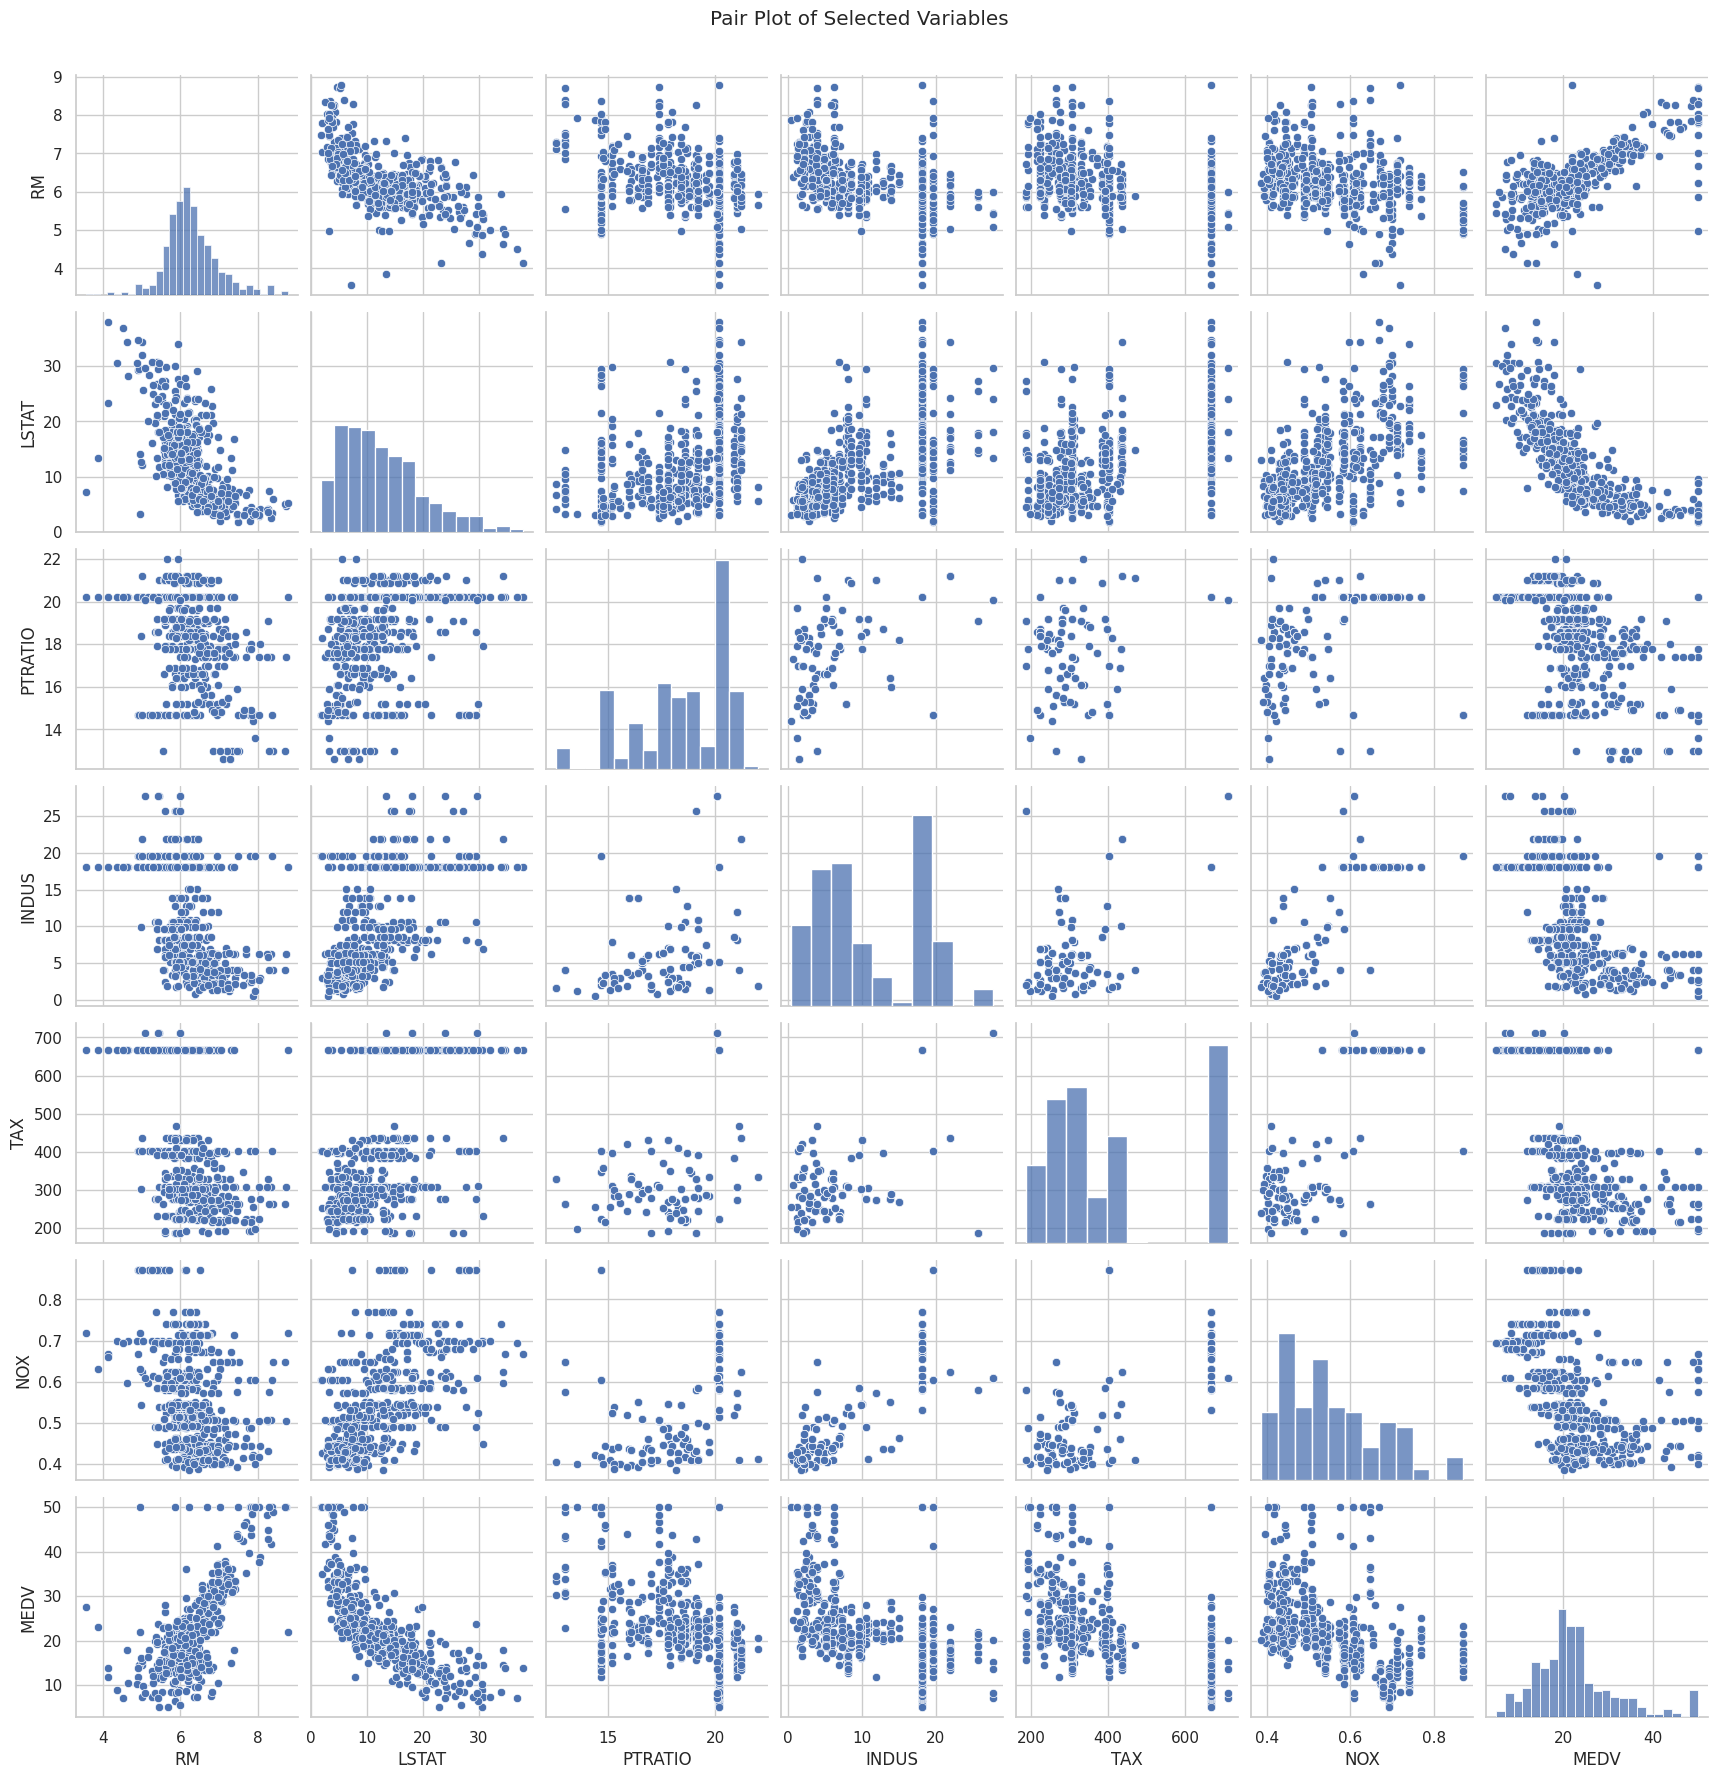

In [9]:
# Select a subset of variables
selected_variables = ["RM", "LSTAT", "PTRATIO", "INDUS", "TAX", "NOX", "MEDV"]
subset_data = data[selected_variables]

# Create a pair plot
pairplot = sns.pairplot(subset_data)
pairplot.fig.suptitle("Pair Plot of Selected Variables", y=1.02)  # y= some height>1
plt.show()


Here is the pair plot for selected variables. In the pair plot, the diagonal shows the distribution of the variable itself, and the other cells show scatter plots for the pair of variables.

The pair plot helps us visualize both the distribution of single variables and relationships between two variables. For example, in the first row, the second cell shows a scatter plot of "RM" (average number of rooms per dwelling) vs "LSTAT" (% lower status of the population). There's a trend where areas with a higher percentage of lower-status population tend to have houses with fewer rooms, indicating potential socioeconomic patterns.

Finally, let's create a correlation matrix heatmap to identify correlated variables

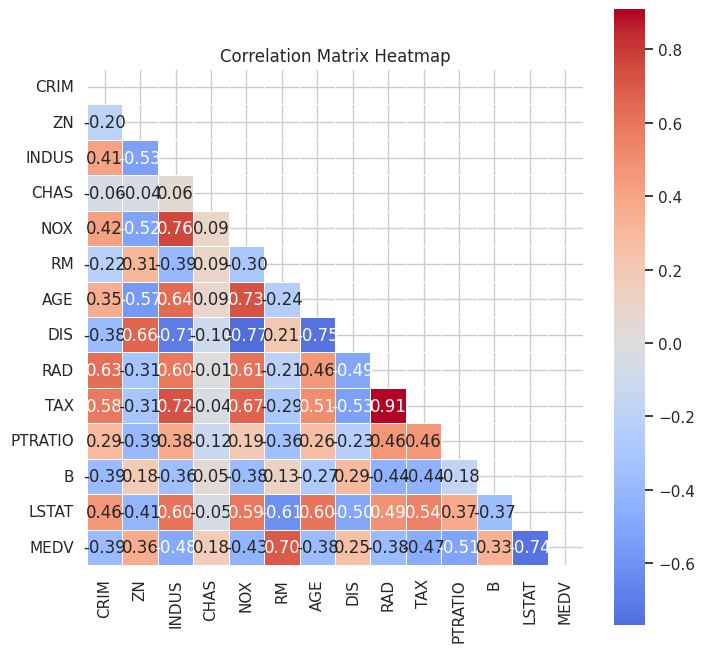

In [10]:
# Create a mask for the upper triangle of the correlation matrix
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(8, 8))
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, annot=True, fmt=".2f",
            square=True, linewidths=.5)

plt.title('Correlation Matrix Heatmap', fontsize=12)
plt.show()


Here's the correlation matrix heatmap of the variables. This heatmap provides a color-coded representation of the correlation coefficients between each pair of variables.

Some key observations are:

RM (average number of rooms per dwelling) has a strong positive correlation with MEDV (Median value of owner-occupied homes). This suggests that houses with more rooms generally have higher median values, which aligns with the scatter plot we saw earlier.

LSTAT (% lower status of the population) has a strong negative correlation with MEDV. This suggests that areas with a higher percentage of lower-status population tend to have lower median home values, which is also consistent with the scatter plot.

PTRATIO (pupil-teacher ratio by town) has a negative correlation with MEDV, although not as strong. Towns with higher pupil-teacher ratios may tend to have lower median home values.

NOX (nitric oxides concentration) has a negative correlation with DIS (weighted distances to five Boston employment centres). This suggests that areas further away from the employment centres tend to have lower pollution levels.

AGE (proportion of owner-occupied units built prior to 1940) has a negative correlation with DIS. This could indicate that older houses tend to be closer to the employment centres.

RAD (index of accessibility to radial highways) and TAX (full-value property-tax rate per $10,000) are strongly correlated, indicating that areas with better highway access may have higher tax rates.

 A pair plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and, therefore, one of the most frequently used visualizations.

Let's create a pair plot for the subset of variables that showed significant correlations with "MEDV". I'll select the variables "RM", "LSTAT", "PTRATIO", "INDUS", "TAX", and "NOX" along with "MEDV" for this plot.

#Data Cleaning

In [11]:
def preprocess_data(df):
    # Handling missing values
    df = df.fillna(df.mean())

In [12]:
# Renaming the target column
df.rename(columns={'MEDV': 'PRICE'}, inplace=True)# Feature selection
X = df.iloc[:, 0:13]
y = np.round(df['PRICE'])
X, y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
 1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
 2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
 3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
 4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
 502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
 503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
 504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
 505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   

In [13]:
# Apply SelectKBest class to extract top 5 best features
best_features = SelectKBest(score_func=chi2, k=5)
fit = best_features.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['FEATURE', 'SCORE']
top_features = feature_scores.nlargest(8, 'SCORE')
print(top_features)
#return X[top_features['FEATURE']], y


   FEATURE         SCORE
9      TAX  14817.836927
1       ZN   5937.859414
0     CRIM   5503.817133
11       B   3340.486412
6      AGE   2424.308937
8      RAD   1445.257647
12   LSTAT   1430.549632
2    INDUS    873.746270


In [14]:
preprocess_data(df)

In [15]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [16]:
# Renaming the target column
df.rename(columns={'MEDV': 'PRICE'}, inplace=True)# Feature selection
X = df.iloc[:, 0:13]
y = np.round(df['PRICE'])
X, y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
 1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
 2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
 3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
 4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
 502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
 503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
 504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
 505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   

In [17]:
from sklearn.model_selection import KFold

In [18]:
def train_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

    # benchmark_model = BenchmarkRegressor()
    linear_regression_model = LinearRegression()
    decision_tree_model = DecisionTreeRegressor()
    random_forest_model = RandomForestRegressor()

    models = [
        # ('Benchmark', benchmark_model),
        ('Linear_Regression', linear_regression_model),
        ('Decision_Tree', decision_tree_model),
        ('Random_Forest', random_forest_model)
    ]

    scores = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold,
                                                     scoring='neg_mean_squared_error')
        sqrt_cv_results = np.sqrt(np.abs(cv_results))
        score = {
            'model': name,
            'RMSE_mean': np.mean(sqrt_cv_results),
            'RMSE_std': np.std(sqrt_cv_results),
            'CV_results': cv_results.tolist()
        }
        scores.append(score)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
        rsquared_score = r2_score(y_test, y_pred)
        print('Model:', name)
        print('RMSE score:', rmse_score)
        print('R2 score:', rsquared_score)
        print('Training Accuracy:', model.score(X_train, y_train) * 100)
        print('Testing Accuracy:', model.score(X_test, y_test) * 100)
        print('Model Accuracy:', r2_score(y, model.predict(X)) * 100)
        print()

    return scores, models

In [19]:
train_models(X, y)

Model: Linear_Regression
RMSE score: 4.834868765717953
R2 score: 0.6454319281765071
Training Accuracy: 74.9644960397722
Testing Accuracy: 64.5431928176507
Model Accuracy: 73.80868578899357

Model: Decision_Tree
RMSE score: 3.9520148092626854
R2 score: 0.7630987394957983
Training Accuracy: 100.0
Testing Accuracy: 76.30987394957984
Model Accuracy: 97.2285949795756

Model: Random_Forest
RMSE score: 3.240826933133936
R2 score: 0.8406904086134455
Training Accuracy: 98.29617824386638
Testing Accuracy: 84.06904086134455
Model Accuracy: 96.63611738348344



([{'model': 'Linear_Regression',
   'RMSE_mean': 4.8510674842267925,
   'RMSE_std': 0.5674396473172738,
   'CV_results': [-35.839168182467986,
    -29.475391436542225,
    -24.318730695649275,
    -20.119220041762947,
    -19.942765184510463,
    -21.259361213276875,
    -29.317306260614846,
    -21.552379602914154,
    -21.18961256486572,
    -15.534499716095633]},
  {'model': 'Decision_Tree',
   'RMSE_mean': 4.754928573513335,
   'RMSE_std': 1.1038846124168216,
   'CV_results': [-15.372093023255815,
    -34.97674418604651,
    -12.744186046511627,
    -19.0,
    -13.046511627906977,
    -30.953488372093023,
    -22.88372093023256,
    -52.46511627906977,
    -18.11627906976744,
    -18.72093023255814]},
  {'model': 'Random_Forest',
   'RMSE_mean': 3.128304763749825,
   'RMSE_std': 0.7901487955148954,
   'CV_results': [-13.467893023255817,
    -7.470251162790697,
    -10.5621023255814,
    -5.767388372093023,
    -4.119860465116279,
    -15.301720930232559,
    -6.007058139534883,
   

Model: Linear_Regression
RMSE score: 5.34459580765692
R2 score: 0.7123128481936213
Training Accuracy: 74.20834485856034
Testing Accuracy: 71.23128481936213
Model Accuracy: 73.77771626819177

Model: Decision_Tree
RMSE score: 3.8078865529319543
R2 score: 0.8539644012944984
Training Accuracy: 100.0
Testing Accuracy: 85.39644012944983
Model Accuracy: 97.4270527948545

Model: Random_Forest
RMSE score: 3.745629031565361
R2 score: 0.8587006193505189
Training Accuracy: 98.1944994499887
Testing Accuracy: 85.8700619350519
Model Accuracy: 96.02967489462955



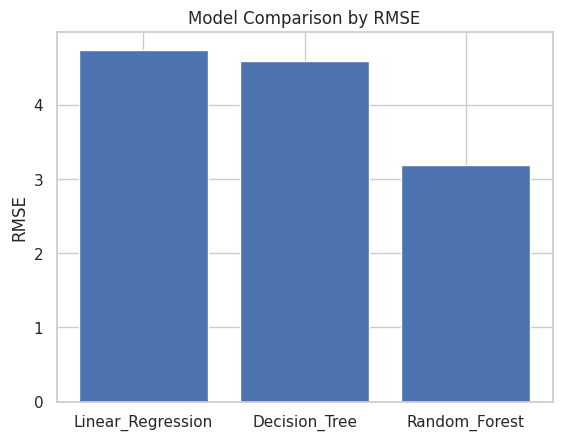

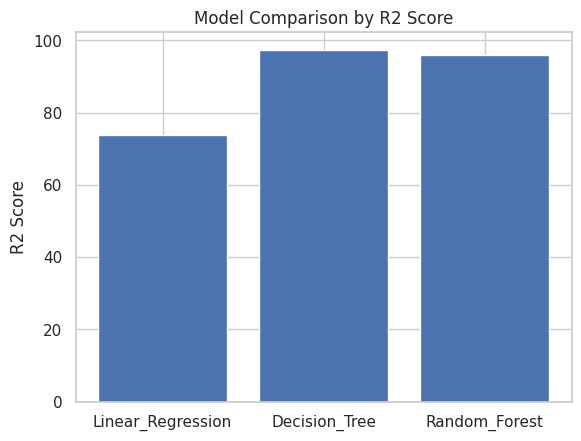

In [20]:
import pickle
import matplotlib.pyplot as plt

# Assuming you have already defined the train_models function and have X, y data

# Train the models
scores, models = train_models(X, y)

# Save each model to a pickle file
for name, model in models:
    with open(f'{name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# Extract RMSE and R2 scores
rmse_scores = [score['RMSE_mean'] for score in scores]
r2_scores = [r2_score(y, model.predict(X)) * 100 for _, model in models]
model_names = [score['model'] for score in scores]

# Plotting the RMSE scores
plt.bar(model_names, rmse_scores)
plt.ylabel('RMSE')
plt.title('Model Comparison by RMSE')
plt.show()

# Plotting the R2 scores
plt.bar(model_names, r2_scores)
plt.ylabel('R2 Score')
plt.title('Model Comparison by R2 Score')
plt.show()


In [22]:
trained_models = [('Linear_Regression', LinearRegression()),
                  ('Decision_Tree', DecisionTreeRegressor()),
                  ('Random_Forest', RandomForestRegressor())]

In [23]:
def load_models():
    linear_regression_model = pickle.load(open('Linear_Regression_model.pkl', 'rb'))
    decision_tree_model = pickle.load(open('Decision_Tree_model.pkl', 'rb'))
    random_forest_model = pickle.load(open('Random_Forest_model.pkl', 'rb'))
    models = [
        ('Linear_Regression', linear_regression_model),
        ('Decision_Tree', decision_tree_model),
        ('Random_Forest', random_forest_model)
    ]
    return models

load_models()

def predict_price(models, data):
    predictions = []
    for name, model in models:
        prediction = model.predict(data)
        predictions.append({'model': name, 'prediction': prediction.tolist()})
    return predictions


In [24]:
import sklearn
print(sklearn.__version__)


1.2.2


30/06

Make sure that your Flask application (app.py) doesn't have any errors. You can do this by running it locally and making sure it works as expected.

In [25]:
#Final Prediction sent to pythonanywhere.com
import requests
import json

# Replace this with your actual data
data = {
    "input": [0.00632, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296, 15.3, 396.90, 4.98]
}


response = requests.post("http://priyanka2023.pythonanywhere.com/predict", json=data)

print(response.json())


[25.52]
